# Assignment 1

## Question 3 (Linear Regression)

This assignment will have you working and experimenting with linear regression. The general multiple linear regression model, given $p$ predictors, is defined as: $$Y=\beta_0+\beta_1X_1+\beta_2X_2+...+\beta_pX_p+\epsilon,$$ where $Y$ is the response variable, $X_j$ is the $j$<sup>th</sup> predictor and $\beta_j$ quantifies the association between the response and the variable. A good way to think about $\beta_j$ is as the average effect on $Y$ of a one unit increase in $X_j$, holding all other predictors fixed. The $\epsilon$ term is the error term, which is independent of $X$ and has mean zero (the expected value of $Y$ when all variables are set to zero).

Work with Numpy only and do not use library functions that directly perform model fitting like `np.polyfit`. However, you may use library functions to compare your results while experimenting. This assignment becomes much easier to complete if accompanied by reading the third chapter in An Introduction to Statistical Learning. The text is freely available for download on the internet at [statlearning.com](statlearning.com)

Reference: James, G., Witten, D., Hastie, T., Tibshirani, R., Taylor, J. (2023). Linear Regression. In: An Introduction to Statistical Learning. Springer Texts in Statistics. Springer, Cham. https://doi.org/10.1007/978-3-031-38747-0_3

### Imports

In [1203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
# other imports if necessary

### Part 1: Simple Regression

In this part, the function `gen_data()` samples hundred data points from a random 25 degree single-variable polynomial. This data is stored in the `predictor` and `response` variables. Your task is to experiment with linear regression on this dataset. Specifically:

1. Fit a line to the curve $(y=\beta_1x+\beta_0)$
2. Fit a polynomial to the curve $(y=\sum_{0}^{k}\beta_kx^k)$ and choose $k$ that satisfactorily minimizes error.
    - Note that the original polynomial is a 25 degree polynomial and we might not need exactly that many.
    - Check how well the coefficients match when we try to fit a 25 degree polynomial to the data. Get the coefficients from the `gen_data()` function.
3. Perform L1 and L2 regularization on the curve obtained from step 2.

Report error metrics for all experiments in tabular form (or any other way that helps us compare and choose between the different methods)



In [1225]:
def gen_data():
    coeff = np.random.rand(25)
    x = np.linspace(-1.1, 0.9, 100)
    y = np.zeros_like(x)
    for i, c in enumerate(coeff):
        y += c * x**i
    y += np.random.randn(100) * 0.1

    return coeff, x, y

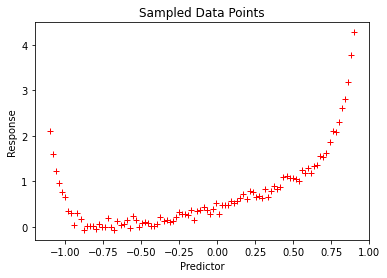

In [1226]:
coeffs, predictor, response = gen_data()
len(predictor), predictor.shape, len(response), response.shape
X, y = predictor, response
X.shape, y.shape
X = X.reshape(-1,1)

plt.plot(predictor, response, 'r+')
plt.xlabel('Predictor')
plt.ylabel('Response')
plt.title('Sampled Data Points')
plt.show()

In [1227]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X
X_test = X
y_train = y
y_test = y

X_copy = X
Y_copy = y

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [1153]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

### 1.

### Linear Regression self-code

### The Error function:

When fitting linear regression to the curve, we try to minimize the error function (MSE) given by 

$y=i \sum_{0}^{n} ($ y<sub>i</sub>  - y<sup>'</sup>)



In [1228]:
class Lin_Reg:

    def __init__(self, learning_rate=0.01, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coeffs = None
        self.bias = None

    def fit(self, X, y):
        m, n = X.shape
        print(m,n)
        self.coeffs = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.coeffs) + self.bias

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.coeffs = self.coeffs - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        return self.coeffs, self.bias

    def predict(self, X):
        y_pred = np.dot(X, self.coeffs) + self.bias
        return y_pred

    def mse(self, y_test, predictions):
        return np.mean((y_test - predictions) ** 2)

In [1229]:
lin_reg = Lin_Reg()
weights, bias = lin_reg.fit(X_train, y_train)
pred_lin_reg = lin_reg.predict(X_test)

print ("MSE for Linear Regression", mean_squared_error(y,pred_lin_reg))
print("weight for Linear Regression is", weights)
print("Bias on fitting linear regression is", bias)

100 1
MSE for Linear Regression 0.38410898883812544
weight for Linear Regression is [0.94272709]
Bias on fitting linear regression is 0.8224832512993709


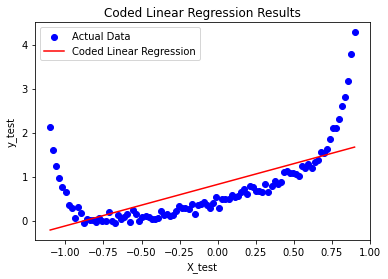

In [1230]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, pred_lin_reg, color='red', label='Coded Linear Regression')
plt.title('Coded Linear Regression Results')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

## Linear Regression using in-built function

In [1231]:
lin_reg_inbuilt = LinearRegression()
lin_reg_inbuilt.fit(X_train, y_train)
pred_in_built = lin_reg_inbuilt.predict(X_test)
mean_squared_error(y_test, pred_in_built)

0.38410898883812544

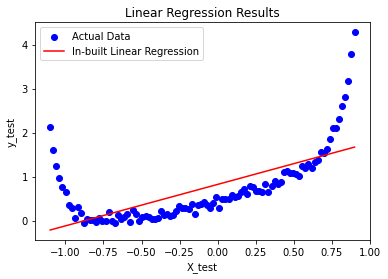

In [1232]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, pred_in_built, color='red', label='In-built Linear Regression')
plt.title('Linear Regression Results')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()
plt.show()

### 2.

### Polynomial Regression

In [1233]:
X, y = predictor, response
X.shape, y.shape
X = X.reshape(-1,1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

X_train = X
X_test = X
y_train = y
y_test = y

X_train = np.array(X_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)

type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [1234]:
class Poly_Reg:

    def __init__(self, degree = 6, learning_rate=0.1, epochs=1000):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coeffs = None
        self.bias = None

    def fit(self, X, y):
        X_poly = self._create_poly_features(X)
        m, n = X_poly.shape
        # m - number of samples
        # n - number of features
        self.coeffs = np.zeros(n)
        self.bias = 0

        # Gradient descent to updated weights and bias
        
        for _ in range(self.epochs):
            y_pred = np.dot(X_poly, self.coeffs) + self.bias
 
            dw = (1/m) * np.dot(X_poly.T, (y_pred-y))
            db = (1/m) * np.sum(y_pred-y)

            self.coeffs = self.coeffs - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        return self.coeffs, self.bias

    def predict(self, X):
        X_poly = self._create_poly_features(X)
        y_pred = np.dot(X_poly, self.coeffs) + self.bias
        return y_pred

    def mse(self, y_test, predictions):
        return np.mean((y_test - predictions)**2)

    def _create_poly_features(self, X):
        X_poly = np.column_stack([X**i for i in range(1, self.degree + 1)])
        return X_poly

In [1235]:
mse_arr = []

for deg in range(1,26):
    poly_reg = Poly_Reg(degree = deg)
    weights, bias = poly_reg.fit(X_train, y_train)
    poly_pred = poly_reg.predict(X_test)
    mse = mean_squared_error(y_test, poly_pred)
    mse_arr.append(mse)


In [1237]:
df = pd.DataFrame({'Coefficients obtained from gen data': coeffs, 'Weights on fitting polynomial': weights})
df

,Coefficients obtained from gen data,Weights on fitting polynomial
0,0.458704,0.750884
1,0.916058,0.440943
2,0.037351,0.543742
3,0.004662,0.547790
4,0.981352,0.495212
5,0.443392,0.530915
6,0.619466,0.423140
7,0.636263,0.473604
8,0.017676,0.342684
9,0.164146,0.407747


In [1238]:
mse_table = pd.DataFrame({'Degree': np.arange(1, 26), 'MSE': mse_arr})
mse_table['MSE'] = mse_table['MSE'].round(4)

# Print the table without index
print(mse_table.to_string(index=False))

 Degree    MSE
      1 0.3841
      2 0.1085
      3 0.1067
      4 0.0512
      5 0.0512
      6 0.0268
      7 0.0268
      8 0.0173
      9 0.0174
     10 0.0135
     11 0.0136
     12 0.0118
     13 0.0118
     14 0.0110
     15 0.0109
     16 0.0105
     17 0.0104
     18 0.0102
     19 0.0101
     20 0.0100
     21 0.0099
     22 0.0099
     23 0.0098
     24 0.0098
     25 0.0097


In [1239]:
best_degree = np.argmin(mse_arr) + 1  # +1 because degrees start from 1
print ("The degree of polynomial that fits the the best: ", best_degree)

The degree of polynomial that fits the the best:  25


### *Observation of MSE with degree and best fit*

1. In most instances, the degree with the best fit comes out to be the degree of the polynomial, i.e. 25. However, occassionally best degree comes out to be in the range of 15 - 21. 

2. We can also observe that the mse tends to stabilize around the degree 13, after which there is only marginal decrease in MSE further with increase in degree. Hence a polynomial of degree approximately 13-15 can also be used to fit accurately to given polynomial to avoid overfitting.

In [1240]:
best_poly_reg = Poly_Reg(degree=best_degree)
best_poly_reg.fit(X_train, y_train)
best_poly_pred = best_poly_reg.predict(X_test)

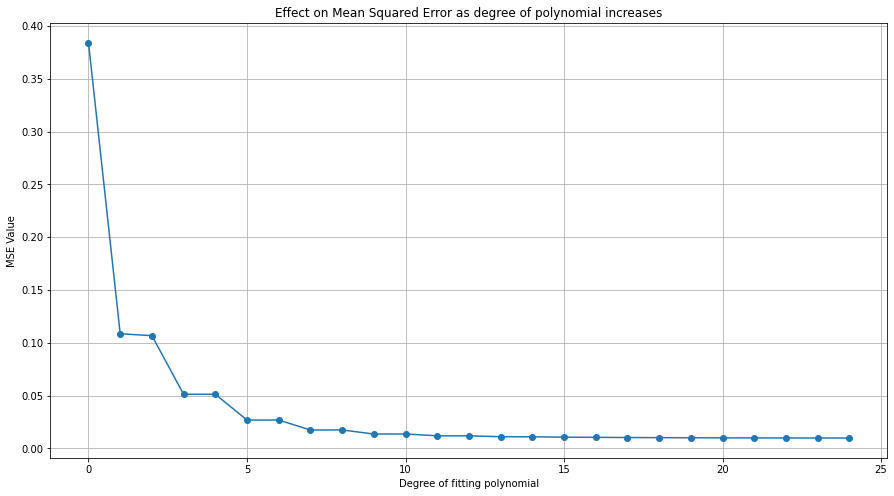

In [1241]:
plt.figure(figsize=(15,8))
plt.plot(mse_arr,'-o')

plt.xlabel('Degree of fitting polynomial')
plt.ylabel('MSE Value')
plt.title('Effect on Mean Squared Error as degree of polynomial increases')
plt.grid(True)
plt.show()

## *Observation* :

1. From the graph, we can see that around polynomial degree 15 the MSE stabilises and there is no decrease in MSE on further increasing the degree. 

2. Hence, it is safe to assume that degree 15 can be best fitting.

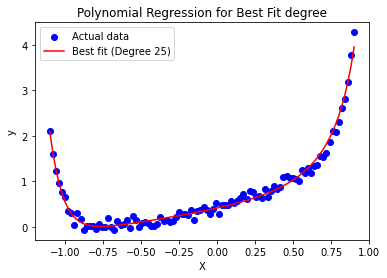

In [1244]:
sorted_indices = np.argsort(X_test[:,0])
X_test_sorted = X_test[sorted_indices]
best_poly_pred_sorted = best_poly_pred[sorted_indices]

plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test_sorted, best_poly_pred_sorted, color='red', label=f'Best fit (Degree {best_degree})')
plt.title('Polynomial Regression for Best Fit degree')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### Comparing Linear and Polynomial Regression Fit

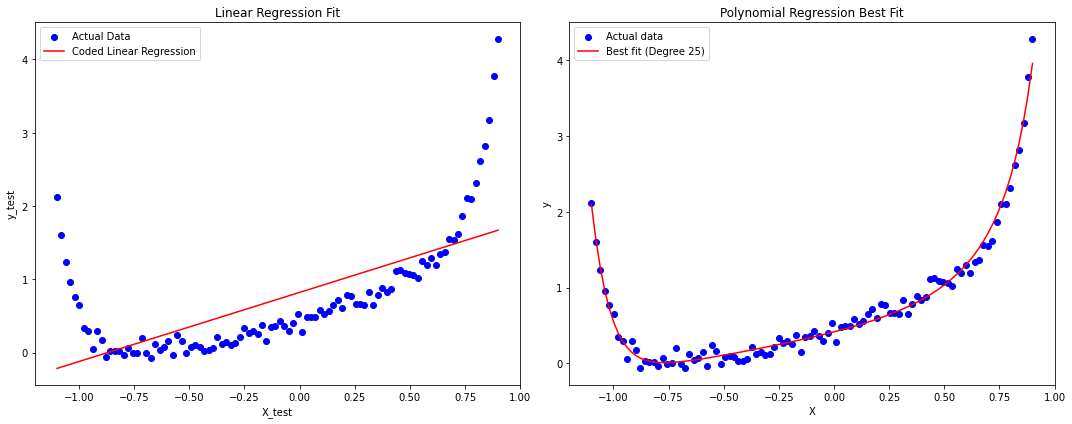

In [1246]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(X_copy, Y_copy, color='blue', label='Actual Data')
plt.plot(X_copy, pred_lin_reg, color='red', label='Coded Linear Regression')
plt.title('Linear Regression Fit')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test_sorted, best_poly_pred_sorted, color='red', label=f'Best fit (Degree {best_degree})')
plt.title('Polynomial Regression Best Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

### *Observation* :

We can see how linear line fits in a more general way while Polynomial regression tries to fit the nuances of the curve more intricately.

### 3.

### L1 and L2 Regularisation

In [1251]:
class Poly_Reg_Regularise:

    def __init__(self, degree=6, learning_rate=0.1, epochs=1000, alpha=0.95, beta=0.95, type=""):
        self.degree = degree
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.alpha = alpha  # L1 regularization parameter
        self.beta = beta  # L2 regularization parameter
        self.coeffs = None
        self.bias = None
        self.type = type

    def fit(self, X, y):
        X_poly = self._create_poly_features(X)
        m, n = X_poly.shape
        # m - number of samples
        # n - number of features
        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X_poly, self.weights) + self.bias

            dw = 0

            if (self.type == "Lasso"):
                dw = (1/m) * np.dot(X_poly.T, (y_pred - y)) + (self.alpha/m) * np.sign(self.weights)

                # penalizes large coefficients by adding the sign of the weights multiplied by the regularization parameter (self.alpha/m) to the gradient

            elif (self.type == "Ridge"):
                dw = (1/m) * np.dot(X_poly.T, (y_pred - y)) + (self.beta/m) * self.weights

                # adds a regularization term proportional to the weights themselves, penalizing large weights but without forcing them to be exactly zero

            db = (1/m) * np.sum(y_pred - y)
            

            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

    def predict(self, X):
        X_poly = self._create_poly_features(X)
        y_pred = np.dot(X_poly, self.weights) + self.bias
        return y_pred

    def mse(self, y_test, predictions):
        return np.mean((y_test - predictions)**2)

    def _create_poly_features(self, X):
        X_poly = np.column_stack([X**i for i in range(1, self.degree + 1)])
        # generates a list of arrays, each containing the original array X raised to a different power from 1 to self.degree
        return X_poly

### *Fitting Lasso and Ridge Regularization*

In [1252]:
mse_arr_lasso = []
mse_arr_ridge = []

for deg in range(1,25):
    
    poly_reg_lasso = Poly_Reg_Regularise(degree=deg, type="Lasso")
    poly_reg_ridge = Poly_Reg_Regularise(degree=deg, type="Ridge")

    poly_reg_lasso.fit(X_train, y_train)
    poly_reg_ridge.fit(X_train, y_train)

    poly_pred_lasso = poly_reg_lasso.predict(X_test)
    poly_pred_ridge= poly_reg_ridge.predict(X_test)

    mse_lasso = mean_squared_error(y_test, poly_pred_lasso)
    mse_ridge = mean_squared_error(y_test, poly_pred_ridge)

    mse_arr_lasso.append(mse_lasso)
    mse_arr_ridge.append(mse_ridge)


In [1253]:
sorted_indices = np.argsort(X_test[:,0])
X_test_sorted = X_test[sorted_indices]
poly_pred_lasso_sorted = poly_pred_lasso[sorted_indices]
poly_pred_ridge_sorted = poly_pred_ridge[sorted_indices]

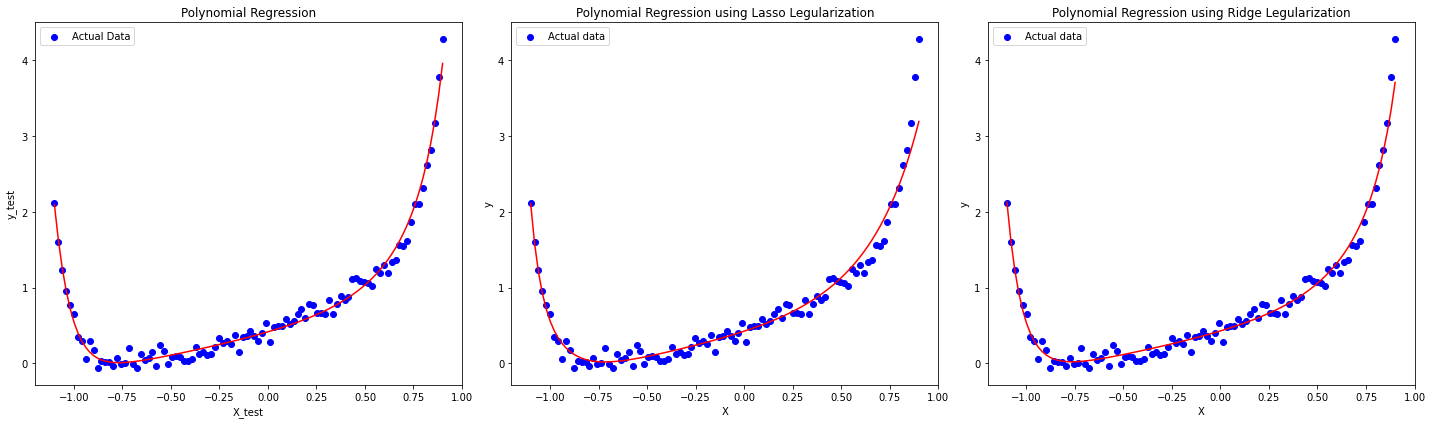

In [1254]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test_sorted, best_poly_pred_sorted, color='red')
plt.title('Polynomial Regression')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test_sorted,  poly_pred_lasso_sorted, color='red')
plt.title('Polynomial Regression using Lasso Legularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test_sorted,  poly_pred_ridge_sorted, color='red')
plt.title('Polynomial Regression using Ridge Legularization')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

### *Observations*

1. Polynomial Regression - It tends to fit the training data very closely, capturing intricate details and potentially overfitting if the degree of the polynomial is too high.

2. When using Regularisation the curve does not fit as closely to the data, hence allowing room for more general and accurate predictions on the test data.

2. Both ridge and lasso provide a balance between flexibility and regularization.

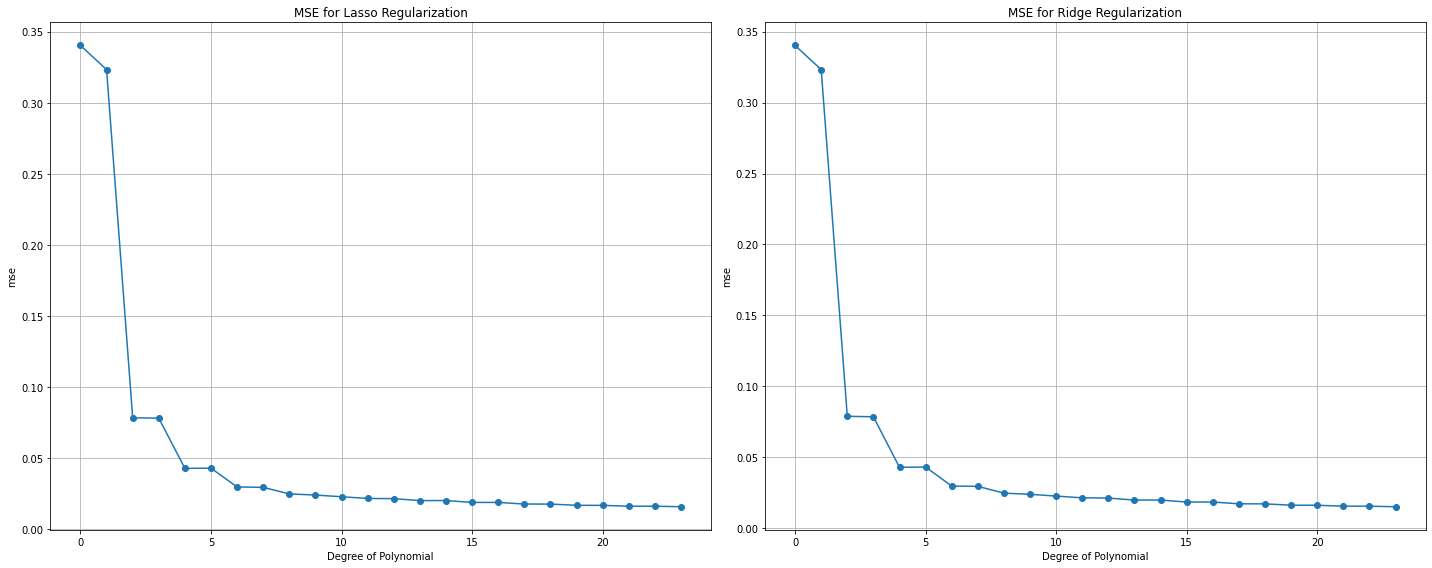

In [1172]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.plot(mse_arr_lasso,'-o')
plt.title('MSE for Lasso Regularization')
plt.xlabel('Degree of Polynomial')
plt.ylabel('mse')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(mse_arr_ridge,'-o')
plt.title('MSE for Ridge Regularization')
plt.xlabel('Degree of Polynomial')
plt.ylabel('mse')
plt.grid(True)

plt.tight_layout()
plt.show()

In [1255]:
errors = pd.DataFrame({'Errors in Ridge ': mse_arr_ridge, 'Errors in lasso': mse_arr_lasso})
errors

,Errors in Ridge,Errors in lasso
0,0.384332,0.384374
1,0.111979,0.110148
2,0.110298,0.109887
3,0.059302,0.058972
4,0.059315,0.058988
5,0.034019,0.038573
6,0.034010,0.038576
7,0.022602,0.030737
8,0.022647,0.030732
9,0.017496,0.029129


### Part 2: Credit Data

In this part, we work with the credit.csv file that predicts `Balance` after looking at predictors like `Income`, `Age`, `Limit`, etc. Your task is to understand the relationship between the predictors and response using linear regression techniques. Specifically:

1. Perform multiple linear regression on the dataset. $(Y=\sum\beta_iX_i+\epsilon)$
2. Test whether all the variables are needed to predict `Balance` or if any of them can be discarded.
3. Test for [interaction effects](https://en.wikipedia.org/wiki/Interaction_(statistics)#In_regression) between `Rating` and `Age`.

As before, perform the above experiments by obtaining and reporting error metrics for all experiments.

#### 2.1 Multiple Linear Regression

In [1173]:
class Multiple_Lin_Reg:

    def __init__(self, learning_rate = 0.1, epochs=10000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.coeffs = None
        self.bias = None
    
    def fit(self, X, y):
        m, n = X.shape
        print(m,n)
        self.coeffs = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.coeffs) + self.bias

            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.coeffs = self.coeffs - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db

        return self.coeffs, self.bias

    def predict(self, X):
        y_pred = np.dot(X, self.coeffs) + self.bias
        return y_pred

    def mse(self, y_test, predictions):
        return np.mean((y_test - predictions) ** 2)

In [1174]:
scaler = StandardScaler()

In [1175]:
credit = pd.read_csv('credit.csv')
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance
0,14.891,3606,283,2,34,11,333
1,106.025,6645,483,3,82,15,903
2,104.593,7075,514,4,71,11,580
3,148.924,9504,681,3,36,11,964
4,55.882,4897,357,2,68,16,331


In [1176]:
x = credit.drop('Balance', axis=1)
y = credit['Balance']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1177]:
mult_lin_reg_model = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
weights, bias = mult_lin_reg_model.fit(X_train, y_train)
print("weights", weights)
print("bias", bias)

320 6
weights [-257.50846042  330.0014357   293.54090199   20.43449784  -15.47752702
    7.16355238]
bias 518.8249999999944


In [1178]:
# Make predictions

predictions = mult_lin_reg_model.predict(X_test)
mse_original = mean_squared_error(y_test, predictions)
print("Mse in balance in calculating balance", mse_original)

Mse in balance in calculating balance 42906.56241476693


In [1179]:
mean_squared_error(y_test, predictions)

42906.56241476693

####  2.2 Which feature has least effect:

#### *Excluding Income*

In [1180]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Income', axis=1)
y = credit['Balance']
x.head()

,Limit,Rating,Cards,Age,Education
0,3606,283,2,34,11
1,6645,483,3,82,15
2,7075,514,4,71,11
3,9504,681,3,36,11
4,4897,357,2,68,16


In [1181]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_income = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_income.fit(X_train, y_train)
pred_excluding_income = model_excluding_income.predict(X_test)
mse_excluding_income =  mean_squared_error(y_test, pred_excluding_income)
print("Mse in balance in calculating balance", mse_excluding_income)

320 5
Mse in balance in calculating balance 76623.73552032554


#### *Excluding Limit*

In [1182]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Limit', axis=1)
y = credit['Balance']
x.head()

,Income,Rating,Cards,Age,Education
0,14.891,283,2,34,11
1,106.025,483,3,82,15
2,104.593,514,4,71,11
3,148.924,681,3,36,11
4,55.882,357,2,68,16


In [1183]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_limit = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_limit.fit(X_train, y_train)
pred_excluding_limit = model_excluding_limit.predict(X_test)
mse_excluding_limit = mean_squared_error(y_test, pred_excluding_limit)
print("Mse in balance in calculating balance", mse_excluding_limit)

320 5
Mse in balance in calculating balance 42141.208782008485


#### *Excluding Rating*

In [1184]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Rating', axis=1)
y = credit['Balance']
x.head()

,Income,Limit,Cards,Age,Education
0,14.891,3606,2,34,11
1,106.025,6645,3,82,15
2,104.593,7075,4,71,11
3,148.924,9504,3,36,11
4,55.882,4897,2,68,16


In [1185]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_rating = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_rating.fit(X_train, y_train)
pred_excluding_rating = model_excluding_rating.predict(X_test)
mse_excluding_rating = mean_squared_error(y_test, pred_excluding_rating)
print("Mse in balance in calculating balance", mse_excluding_rating)

320 5
Mse in balance in calculating balance 44422.640823537


#### *Excluding Cards*

In [1186]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Cards', axis=1)
y = credit['Balance']
x.head()

,Income,Limit,Rating,Age,Education
0,14.891,3606,283,34,11
1,106.025,6645,483,82,15
2,104.593,7075,514,71,11
3,148.924,9504,681,36,11
4,55.882,4897,357,68,16


In [1187]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_cards = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_cards.fit(X_train, y_train)
pred_excluding_cards = model_excluding_cards.predict(X_test)
mse_excluding_cards = mean_squared_error(y_test, pred_excluding_cards)
print("Mse in balance in calculating balance", mse_excluding_cards)

320 5


Mse in balance in calculating balance 42791.9051265283


#### *Excluding Age*

In [1188]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Age', axis=1)
y = credit['Balance']
x.head()

,Income,Limit,Rating,Cards,Education
0,14.891,3606,283,2,11
1,106.025,6645,483,3,15
2,104.593,7075,514,4,11
3,148.924,9504,681,3,11
4,55.882,4897,357,2,16


In [1189]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_age = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_age.fit(X_train, y_train)
pred_excluding_age = model_excluding_age.predict(X_test)
mse_excluding_age = mean_squared_error(y_test, pred_excluding_age)
print("Mse in balance in calculating balance", mse_excluding_age)

320 5
Mse in balance in calculating balance 43135.02485236889


#### *Excluding Education*

In [1190]:
credit = pd.read_csv('credit.csv')
x = credit.drop('Balance', axis=1)
x = x.drop('Age', axis=1)
y = credit['Balance']
x.head()

,Income,Limit,Rating,Cards,Education
0,14.891,3606,283,2,11
1,106.025,6645,483,3,15
2,104.593,7075,514,4,11
3,148.924,9504,681,3,11
4,55.882,4897,357,2,16


In [1191]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model_excluding_education = Multiple_Lin_Reg(learning_rate=0.01, epochs=10000)
model_excluding_education.fit(X_train, y_train)
pred_excluding_education = model_excluding_education.predict(X_test)
mse_excluding_education = mean_squared_error(y_test, pred_excluding_education)
print("Mse in calculating balance", mse_excluding_education)

320 5
Mse in calculating balance 43135.02485236889


### Comparison of errors when excluding different features

In [1192]:
data = {'Feature excluded': ['Income', 'Limit', 'Rating', 'Cards', 'Age','Education'],
        'Mse Value': [mse_excluding_income, mse_excluding_limit, mse_excluding_rating, mse_excluding_cards, mse_excluding_age, mse_excluding_education]}

mse_df = pd.DataFrame(data)
mse_df

,Feature excluded,Mse Value
0,Income,76623.735520
1,Limit,42141.208782
2,Rating,44422.640824
3,Cards,42791.905127
4,Age,43135.024852
5,Education,43135.024852


 #### *Which feature has the most impact on Balance?*
 
 - It can be seen that removing feature `Income` has a significant impact on the MSE of the Multiple Regression Fit, indicating that Income is a highly important feature in calculating Balance, not considering which significantly impacts the accuracy score. 

 - The reduction in MSE signifies that accounting for these interactions has a discernible impact on the dependent variable's value. This underlines the importance of capturing and understanding the interplay between different features, as it can significantly influence the predictive accuracy and overall performance of the model



 #### *Can any feature be discarded?*

 - Except `Income`, MSE is not majorly affected by removing any other feature as can be seen from the mse table above.

 - It may be concluding that removing any other feature except for `Income` will not have a significant impact on the MSE


####  2.3 Interaction Effects

In [1193]:
credit['Interaction'] = credit['Rating'] * credit['Age']
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Balance,Interaction
0,14.891,3606,283,2,34,11,333,9622
1,106.025,6645,483,3,82,15,903,39606
2,104.593,7075,514,4,71,11,580,36494
3,148.924,9504,681,3,36,11,964,24516
4,55.882,4897,357,2,68,16,331,24276


In [1194]:
x = credit.drop('Balance', axis=1)
y = credit['Balance']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [1195]:
mult_lin_reg_model = Multiple_Lin_Reg(learning_rate=0.05, epochs=1000)
weights, bias = mult_lin_reg_model.fit(X_train, y_train)
print("weights", weights)
print("bias", bias)

320 7
weights [-257.40455115  316.478277    289.53331355   20.2932969   -26.92481059
    7.15520206   21.95601763]
bias 518.8249999999989


In [1196]:
# Make predictions

prediction_interaction = mult_lin_reg_model.predict(X_test)
print("MSE without considering interaction effect is" , mse_original)
print("MSE when interaction effect is included is", mean_squared_error(y_test, prediction_interaction))

MSE without considering interaction effect is 42906.56241476693
MSE when interaction effect is included is 42795.2647844797


### *Insgihts when Interaction Effect is taken into account* :

- We observe that upon incorporating an additional feature that represents the interaction between the `Rating` and `Age` features in the dataset, the Mean squared error is minimised to some extent. The weight for the seventh interaction feature is also non-zero.

- The change in MSE signifies that accounting for these interactions has a discernible impact on the dependent variable's value. This underlines the importance of capturing and understanding the interplay between different features, as it can significantly influence the predictive accuracy and overall performance of the model

### Part 3: Shark Attacks

This is a fun dataset that aims to predict the number of shark attacks (`SharkAttacks`) using variables like `Year`, `Month`, `Temperature`, and `IceCreamSales`. This dataset has been used in popular media to show how correlation does not imply causation. Test whether predictions made with ice cream sales data are any better/worse than predictions made by neglecting ice cream sales data.

This sort of analysis reminds us that it is important to look at the data before using it for learning representations.

In [1197]:
sharks = pd.read_csv('shark_attacks.csv')
sharks.head()

,Year,Month,SharkAttacks,Temperature,IceCreamSales
0,2008,1,25,11.9,76
1,2008,2,28,15.2,79
2,2008,3,32,17.2,91
3,2008,4,35,18.5,95
4,2008,5,38,19.4,103


### Using Ice Cream Sales Data

In [1198]:
x = sharks.drop('SharkAttacks', axis=1)
y = sharks['SharkAttacks']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [1199]:
# type(X_train), type(y_train), type(X_test), type(y_test)

In [1200]:
mult_model_2 = Multiple_Lin_Reg()
mult_model_2.fit(X_train, y_train)
y_preds_2 = mult_model_2.predict(X_test)
print("MSE when Ice Cream Sales is included", mean_squared_error(y_test, y_preds_2))

16 4
MSE when Ice Cream Sales is included 44.80443901313578


### Without Using Ice Cream Sales Data

In [1201]:
sharks = sharks.drop('IceCreamSales', axis = 1)  # drop ice cream column

x = sharks.drop('SharkAttacks', axis=1)
y = sharks['SharkAttacks']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [1202]:
mult_model_3 = Multiple_Lin_Reg()
mult_model_3.fit(X_train, y_train)
y_preds_3 = mult_model_3.predict(X_test)
print("MSE when Ice Cream Sales is excluded", mean_squared_error(y_test, y_preds_3) )

67 3
MSE when Ice Cream Sales is excluded 48.30962851207795


#### *Observation* :

1. We observe that removing `IceCreamSales` feature from the dataset does not have a significant impact on the MSE, however, the MSE increases by some amount when the feature is removed.

2. This might mislead us to think that `IceCreamSales` is an important feature to calculate Shark attacks. However, in real life, it's crucial to understand that correlation does not imply causation. 

3. Just because there is a correlation between two variables, such as ice cream sales and shark attacks, doesn't mean that one causes the other. There might be an underlying factor, like warmer weather, that influences both ice cream sales and shark activity independently. Drawing conclusions based solely on correlation can lead to erroneous assumptions about causation. Therefore, it's essential to consider other factors and conduct more in-depth analyses before making causal claims.